# Στοιχεία Ομάδας
***

|Όνομα|ΑΜ|Ομάδα|
|-|-|-|
|Λιάτσος Γεώργιος-Ελευθέριος|03114026|Α11|
|Κουτρούλης Σπυραντώνης     |03114864|Α11|

## Εισαγωγή βιβλιοθηκών 

In [1]:
!pip install --upgrade pip
!pip install --upgrade numpy
!pip install --upgrade pandas
!pip install --upgrade nltk
!pip install --upgrade scikit-learn
!pip install --upgrade joblib

Requirement already up-to-date: pip in /home/nbuser/anaconda3_420/lib/python3.5/site-packages (18.1)
    100% |████████████████████████████████| 17.2MB 101kB/s ta 0:00:011████████▊                     | 5.7MB 9.4MB/s eta 0:00:02
  Found existing installation: numpy 1.15.4
    Uninstalling numpy-1.15.4:
      Successfully uninstalled numpy-1.15.4
    100% |████████████████████████████████| 8.7MB 2.9MB/s eta 0:00:01     | 4.6MB 24.2MB/s eta 0:00:01
  Found existing installation: pandas 0.19.2
    Uninstalling pandas-0.19.2:
      Successfully uninstalled pandas-0.19.2
    100% |████████████████████████████████| 1.4MB 3.9MB/s ta 0:00:011    30% |█████████▋                      | 430kB 17.4MB/s eta 0:00:01
  Running setup.py bdist_wheel for nltk ... done
  Stored in directory: /home/nbuser/.cache/pip/wheels/4b/c8/24/b2343664bcceb7147efeb21c0b23703a05b23fcfeaceaa2a1e
Successfully built nltk
  Found existing installation: nltk 3.2.1
    Uninstalling nltk-3.2.1:
      Successfully uninstalled

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Εισαγωγή και μορφοποίηση του dataset

In [2]:
import pandas as pd

dataset_url = "https://drive.google.com/uc?export=download&id=1PdkVDENX12tQliCk_HtUnAUbfxXvnWuG"
df_data_1 = pd.read_csv(dataset_url, sep='\t',  header=None, quoting=3, error_bad_lines=False)

In [3]:
import numpy as np

team_seed_number = 11

movie_seeds_url = "https://drive.google.com/uc?export=download&id=1NkzL6rqv4DYxGY-XTKkmPqEoJ8fNbMk_"
df_data_2 = pd.read_csv(movie_seeds_url, header=None, error_bad_lines=False)

my_index = df_data_2.iloc[team_seed_number,:].values

titles = df_data_1.iloc[:, [2]].values[my_index] # movie titles (string)
categories = df_data_1.iloc[:, [3]].values[my_index] # movie categories (string)
bins = df_data_1.iloc[:, [4]]
catbins = bins[4].str.split(',', expand=True).values.astype(np.float)[my_index] # movie categories in binary form (1 feature per category)
summaries =  df_data_1.iloc[:, [5]].values[my_index] # movie summaries (string)
corpus = summaries[:,0].tolist() # list form of summaries

Τυπώνουμε τους τίτλους των ταινιων μας.

In [26]:
titles.tolist()

[['Martyrs'],
 ["Everybody's woman"],
 ['The Deaths of Ian Stone'],
 ['Cross'],
 ['Personel'],
 ['La Menace'],
 ['The Vicar of Bray'],
 ['Borrowed Bride'],
 ['Gunaah'],
 ["Eagle's Wing"],
 ['The Pumaman'],
 ['A Million'],
 ['Shapoklyak'],
 ['Santa Sangre'],
 ['Essex Boys'],
 ['Come Fly with Me'],
 ["An Autumn's Tale"],
 ['The Omega Code'],
 ['Rosarigasinos'],
 ['The Navigators'],
 ['Rowdy Rathore'],
 ['The House of 1,000 Dolls'],
 ['Best Defense'],
 ['Everyone Stares: The Police Inside Out'],
 ['Pehchaan'],
 ['Billy Madison'],
 ['Anchorman: The Legend of Ron Burgundy'],
 ['Five Cities'],
 ['5th Ave Girl'],
 ['Apocalypse Oz'],
 ['Envy'],
 ['Dead On: Relentless II'],
 ['Revolutionary Road'],
 ["My Mother's Laptop"],
 ['Country Dance'],
 ['The Sea Beast'],
 ['Urban Legends: Final Cut'],
 ['Dil Apna Aur Preet Parai'],
 ['Chamatkar'],
 ['Mr. Robinson Crusoe'],
 ['Our Town'],
 ['Yojimbo'],
 ["Leave 'Em Laughing"],
 ['The Face on the Bar Room Floor'],
 ['Sarafina!'],
 ['Captain January'],
 ['

# Εφαρμογή 1


## Προεπεξεργασία corpus

Αρχικά, αποφασίσαμε να αφαιρέσουμε τα ονόματα από το tf-idf μας, καθώς για διάφορες παραμέτρους προτείνονταν ταινίες θεματικά άσχετες μεταξύ τους,
αρκεί κάποιοι απ τους πρωταγωνιστές να έχουν το ίδιο ονομα. Επειδή η προσθήκη της λίστας names στη συνάρτηση καθυστερούσε πάρα πολύ τις διαδοχικές δοκιμαστικές εκτελέσεις του vectorizer, αποφασίσουμε να τρέξουμε μία φορά το παρακάτω block, αποθηκεύοντας σε μια δική μας λίστα τα ονόματα που εμφανίζονται στο dataset μας και να χρησιμοποιούμε αυτή τη λίστα για τη δημιουργία του tf-idf vector. 

In [4]:
import nltk
nltk.download('wordnet')
nltk.download('names')
nltk.download('stopwords') # κατεβάζουμε ένα αρχείο που έχει stopwords στα αγγλικά
nltk.download('punkt')
from nltk.corpus import names
'''
our_names = []

def find_names(text):
  a = corpus[text].split()
  for j in a:
    if j in names.words():
      our_names.append(j)
      
import time
start_time = time.time() 
for i in range(len(corpus)) : find_names(i)
print(np.unique(our_names))
end_time = time.time()-start_time
print(end_time, 'seconds')
'''



[nltk_data] Downloading package wordnet to /home/nbuser/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package names to /home/nbuser/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.
[nltk_data] Downloading package stopwords to /home/nbuser/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /home/nbuser/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


"\nour_names = []\n\ndef find_names(text):\n  a = corpus[text].split()\n  for j in a:\n    if j in names.words():\n      our_names.append(j)\n      \nimport time\nstart_time = time.time() \nfor i in range(len(corpus)) : find_names(i)\nprint(np.unique(our_names))\nend_time = time.time()-start_time\nprint(end_time, 'seconds')\n"

In [6]:
from sklearn.externals import joblib
#joblib.dump(np.unique(our_names), 'our_names.pkl') 

In [7]:
our_names = joblib.load('our_names.pkl').tolist()
print(our_names)

['Aamir', 'Aaron', 'Abbot', 'Abbott', 'Abby', 'Abdul', 'Abdullah', 'Abe', 'Abel', 'Abigail', 'Abigale', 'Abner', 'Abraham', 'Ace', 'Ada', 'Adam', 'Adams', 'Addis', 'Adel', 'Adelaide', 'Adele', 'Adeline', 'Adi', 'Aditya', 'Adolf', 'Adolfo', 'Adolph', 'Adore', 'Adrian', 'Adriana', 'Adrienne', 'Agamemnon', 'Agatha', 'Aggie', 'Agnes', 'Ahmad', 'Ahmed', 'Ahmet', 'Aidan', 'Aime', 'Ajay', 'Al', 'Alameda', 'Alan', 'Alanna', 'Alastair', 'Albert', 'Alberta', 'Alberto', 'Albrecht', 'Alden', 'Aldo', 'Alec', 'Alejandra', 'Alejandro', 'Alessandra', 'Aleta', 'Alex', 'Alexa', 'Alexander', 'Alexandra', 'Alexei', 'Alexia', 'Alexis', 'Alf', 'Alfie', 'Alfonso', 'Alfred', 'Alfredo', 'Algernon', 'Ali', 'Alice', 'Alicia', 'Alina', 'Aline', 'Alisa', 'Alisha', 'Alison', 'Alla', 'Allah', 'Allan', 'Allegra', 'Allen', 'Alley', 'Allison', 'Ally', 'Alma', 'Aloysius', 'Alphonse', 'Alston', 'Alta', 'Althea', 'Alvin', 'Amanda', 'Amara', 'Amber', 'Ambrose', 'Ame', 'Amelia', 'Amelie', 'Ami', 'Amie', 'Amity', 'Amos', 'Am

Έπειτα, δημιουργούμε τη συνάρτηση που φιλτράρει το σώμα των περιλήψεών μας, χρησιμοποιώντας τη συνάρτηση thorough_filter που συμπεριλαμβάνεται στα notebooks του εργαστηρίου,  εξαιρώντας τα αγγλικά stopwords, την στίξη, τα ονόματα και κάποιες άλλες λέξεις που εμφανίζονται συχνά στο dataset μας και τελικά περνάμε τις λέξεις που απέμειναν από έναν Stemmer.

In [8]:
import string
def thorough_filter(words):
    filtered_words = []
    for word in words:
        pun = []
        for letter in word:
            pun.append(letter in string.punctuation)
        if not all(pun):
            filtered_words.append(word)
    return filtered_words

In [9]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

def preprocess_document(document):
    words = nltk.word_tokenize(document.lower())
    filtered_words = [word for word in words if word not in stopwords.words('english')+ list(string.punctuation)+ our_names  +['film','movie','plot','actor','actress']]
    filtered_words = thorough_filter(filtered_words)
    stemmed_words  =[PorterStemmer().stem(word) for word in filtered_words]
    return " ".join(stemmed_words)

## Tf-idf vectorizer

Tέλος, κάνουμε fit τον βελτιστοποιημένο vectorizer μας, επιλέγοντας max_df=0.4, min_df=0.01. To εύρος φαντάζει μεν αρκετά περιορισμένο, είναι ωστόσο το εύρος που μας δίνει διαισθητικά τα καλύτερα αποτελέσματα, ύστερα από τις διάφορες δοκιμές μας για εύρη και συναρτήσεις προεπεξεργασίας δεδομένων.

In [10]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

print("Dimensions after optimizing TfidfVectorizer parameters")
corpus_tf_idf = joblib.load('corpus_tf_idf.pkl')

#vectorizer = TfidfVectorizer(max_df=0.4, min_df=0.01, preprocessor=preprocess_document)
#corpus_tf_idf = vectorizer.fit_transform(corpus).toarray() # επιστρέφει sparse matrix, γι'αυτό το κάνουμε .toarray()
#from sklearn.externals import joblib
#joblib.dump(corpus_tf_idf, 'corpus_tf_idf.pkl') 
#!ls

print('TF-IDF array shape:', corpus_tf_idf.shape)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


Dimensions after optimizing TfidfVectorizer parameters
TF-IDF array shape: (5000, 2046)


## Content Recommender

In [11]:
from joblib import Parallel, delayed
import scipy.spatial

def content_recommender(target_movie,max_recommendations):
    d = Parallel(n_jobs=-1)(delayed(scipy.spatial.distance.cosine)(corpus_tf_idf[i],corpus_tf_idf[target_movie]) for i in range(len(corpus_tf_idf)))
    dist = np.array(d)
    closest_movies = np.argsort(dist,axis=0)
    for j in range(max_recommendations+1):
        i = closest_movies[j]
        if j == 0:
            print('Target Movie')
        else:
            print('Closest Movie',j)
        print(i)
        print(titles[i])
        print(corpus[i])
        print(categories[i],'\n')    


## Επεξήγηση επιλογών και ποιοτική ερμηνεία

Χρησιμοποιώντας την content_recommender ελέγξαμε για διάφορες ταινίες τις προτάσεις που πήραμε. Είμαστε γενικά ιδιαίτερα ικανοποιημένοι από το σύστημα προτάσεων που δημιουργήθηκε και παραθέτουμε ενδεικτικά 10 IDs για τα οποία οι προτάσεις ήταν ποιοτικά ορθές.

|No|Movie|Common Theme|Common Words|
|-|-|-|-|
|1|Borrowed Bride (7)|Marriage, Childhood Friends, Love, Tradition|'marry','love','friends'|
|2|Manband the Movie (4514)|Music, Bands|'music', 'band', 'sing'|
|3|Only When I Dance (500)|Dance|'dance', 'dream'|
|4|Killer Bean Forever (1996)|Crime|'killer', 'detective', 'investigate'|
|5|Martys (0)|Horror, Death, Escape, Secrets|'escape', 'kill', 'attack','sex', 'secret','house'|
|6|Jaws 2 (72)|Sea, Action, Danger, Creatures|'boat', 'water','sink','dive'|
|7|Merury Rising (3000)|Action, Crime, Mystery, US Government|'FBI', 'kill','murder'|
|8|Bagong Buwan (2100)|War|'war','village'|
|9|Yojimbo (41)|Action, Crime, Death,|'kill','shoot','kidnap','prisoner'|
|10|Deadly Messages (825)|Thriller, Horror, Drama|'kill', 'attack', 'death'|

In [94]:
content_recommender(7,5)

Target Movie
7
['Borrowed Bride']
Ali is 18 year old and still a boy at heart. He is engaged to marry his childhood friend Neşe, but is unenthusiastic about it. Emine is a poor woman whose boyfriend Hasan is in jail. To help Ali prepare for his wedding and married life, his parents decide to arrange a traditional Eğreti Gelin . This job is taken on by Emine who is desperate for the money, but also fearful of hot tempered Hasan's reaction. But complications come up when Ali and Emine fall in love with each other.
['"Drama"'] 

Closest Movie 1
247
['De Taali']
Paglu , Abhi  and Amrita 'Amu'  are best friends since childhood. Abhi's father  is a very rich businessman, and his only son has no interest in work. Abhi has had many girlfriends, but none of them loved him. Paglu and Abhi's father tells Amu to marry Abhi because they know each other very well. One day Abhi comes and tells Amu that he loves someone that is his childhood friend; Amu thinks that she is the girl whom Abhi loves and 

# Εφαρμογή 2


## Δημιουργία dataset

In [14]:
def build_final_set(doc_limit = 5000, tf_idf_only=False):
    # convert sparse tf_idf to dense tf_idf representation
    dense_tf_idf = corpus_tf_idf[0:doc_limit,:]
    if tf_idf_only:
        # use only tf_idf
        final_set = dense_tf_idf
    else:
        # append the binary categories features horizontaly to the (dense) tf_idf features
        final_set = np.hstack((dense_tf_idf, catbins[0:doc_limit,:]))
        # η somoclu θέλει δεδομ΄ένα σε float32
    return np.array(final_set, dtype=np.float32)

In [15]:
final_set = build_final_set()

In [16]:
final_set.shape

(5000, 2368)

Δοκιμάσαμε διάφορα επίπεδα προεπεξεργασίας του final_set μας. Σαν ιδέα, μας φάνηκε καλή η χρήση ενός scaler για περιορισμό του εύρους του πεδίου τιμών των χαρακτηριστικών μας. Κάτι τέτοιο ωστόσο οδήγησε σε "εξωμάλυνση" των διαφορών των κατηγοριών και τη δημιουργία clusters "χωρίς σαφή ταυτότητα".

Δοκιμάσαμε έπειτα να μειώσουμε τη διαστατικότητα με PCA, καθώς η διακύμανση των τιμών έχει ήδη εν μέρει ελεγχθεί από τα df μας κατά τη δημιουργία του tf_idf. Έχοντας ωστόσο μειώσει ήδη πάρα πολύ τη διάσταση του tf_idf vector κάτι τέτοιο δεν είναι απαραίτητο. Οδήγησε μάλιστα σε ίσως πιο "καθαρά" clusters από άποψη κατηγοριών, αλλά πιο "βρώμικο" τελικό χάρτη, καθώς οι κατηγορίες δεν μεταβάλονταν ομαλά στους  γειτονικούς νευρώνες και Clusters.

Επιλέξαμε επομένως να χρησιμοποιήσουμε το set μας χωρίς κάποιου είδους προεπεξεργασία δεδομένων.

## Εκπαίδευση χάρτη SOM

In [43]:
!pip install --upgrade somoclu


    100% |████████████████████████████████| 6.2MB 862kB/s ta 0:00:011
  Running setup.py bdist_wheel for somoclu ... done
  Stored in directory: /home/nbuser/.cache/pip/wheels/85/3c/e5/5b1c535e93453367a8e3d35a377d3c668da00369b1a4302ad8
Successfully built somoclu


In [18]:
'''
n_rows, n_columns = 20, 20
som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False)
%time som.train(final_set,epochs=100)
joblib.dump(som, 'som.pkl')
'''

print('CPU times: user 1h 3min 53s, sys: 39.5 s, total: 1h 4min 33s')
print('Wall time: 32min 37s')

CPU times: user 1h 3min 53s, sys: 39.5 s, total: 1h 4min 33s
Wall time: 32min 37s


## Best Matching Units και Clustering

Εντοπίζουμε αρχικά τα bmus και τυπώνουμε το U-Matrix

In [48]:
import somoclu, matplotlib
%matplotlib inline
som = joblib.load('som.pkl')
bmus = som.bmus
print(bmus.shape)
ubmus, indices = np.unique(bmus, return_inverse=True, axis=0)

(5000, 2)


In [157]:
print(len(indices))

5000


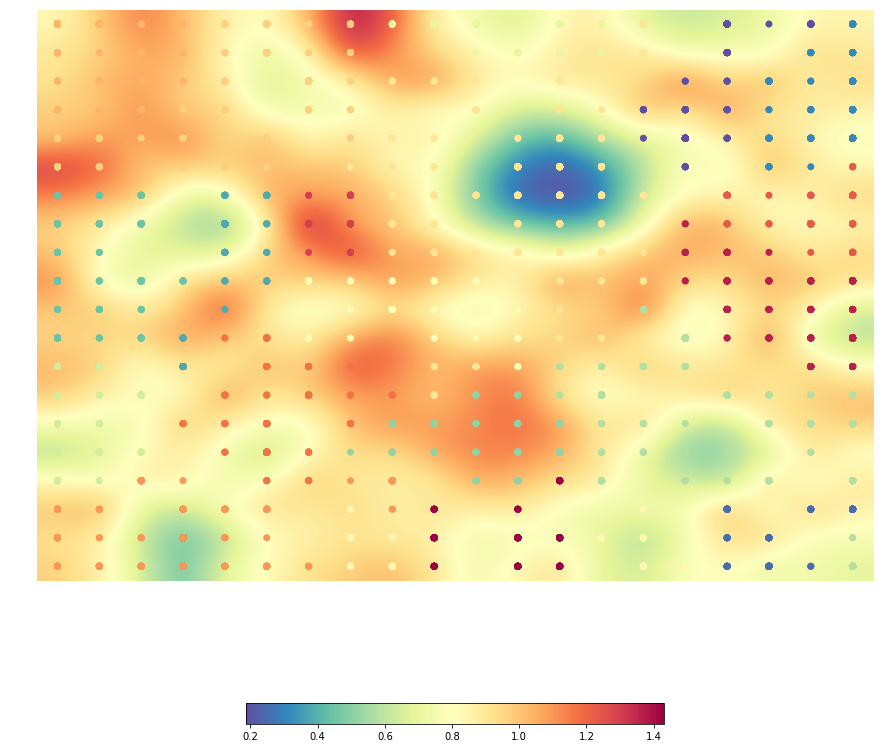

<module 'matplotlib.pyplot' from '/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/pyplot.py'>

In [58]:
colors = ["red"] * len(bmus)
colors.extend(["green"] * len(bmus))
colors.extend(["blue"] * len(bmus))

som.view_umatrix(bestmatches=True, colorbar=True, figsize=(15, 15))

Eπιλέγουμε έπειτα τον K-means και πραγματοποιούμε clustering του dataset σε 20 ομάδες. 

Παρατηρήσαμε για μικρότερα μεγέθη ότι δεν είναι ικανοποιητικά σαφής ο διαχωρισμός των Clusters από άποψη επικρατουσών κατηγοριών.
Παρατηρήσαμε ακόμα πως για μεγαλύτερα μεγέθη υπάρχει μεν καλύτερη κατανομή των λιγότερο συχνών κατηγοριών του dataset μας, αλλά και μεγαλύτερος κατακερματισμός των πιο συχνών- βασικών.

Γι αυτό συνεχίσαμε με k = 20 για αυτό το μέγεθος χάρτη.

In [50]:
from sklearn.cluster import KMeans
algorithm = KMeans(n_clusters=20)
som.cluster(algorithm=algorithm)

In [59]:
clusters = som.clusters
print(clusters.size)
print(clusters)

400
[[13 13 13 13 12 12 12 12  8  8  8  8  8  8 11  0  0  0  0  2]
 [13 13 13 13 12 12 12 12  8  8  8  8  8  8 11  0  0  2  2  2]
 [13 13 13 13 12 12 12 12 11 11 11  8 11 11  0  0  0  2  2  2]
 [13 13 13 12 12 12 12 12 11 11 11 11 11 11  0  0  0  2  2  2]
 [12 12 12 12 12 12 12 12 11 11 11 11 11 11  0  0  0  2  2  2]
 [12 12  3 12 12 12 11 11 11 11 11 11 11 11 11  0  0  2  2 16]
 [ 4  4  4  3  3  3 17 17 11 11 11 11 11 11 11  0 16 16 16 16]
 [ 4  4  4  3  3  3 17 17 11 11 11 11 11 11 11 18 16 16 16 16]
 [ 4  4  4  3  3  3 17 17 11 11 11 11 11 11 11 18 18 18 16 16]
 [ 4  4  4  4  3  3  9  9  9  9  9 11 11 11 11 18 18 18 18 18]
 [ 4  4  4  4  3  9  9  9  9  9  9  9 11 11  6 18 18 18 18 18]
 [ 4  4  4  3 15 15  9  9  9  9  9  9 11 11  6  6 18 18 18 18]
 [ 7  7  7  3 15 15 15 15 11 11 11  9  6  6  6  6  6 18 18 18]
 [ 7  7  7  7 15 15 15 15 15 11  5  5  6  6  6  6  6  6  6  6]
 [ 7  7  7 15 15 15 15 15  5  5  5  5  5  6  6  6  6  6  6  6]
 [ 7  7  7 14 15 15 15  5  5  5  5  5  5  6  6  6  

In [60]:
uclusters,counts  = np.unique(clusters, return_counts=True)
ind=np.flip(np.argsort(counts),axis=0) #flip για να χουμε σε αύξουσα σειρά
print("Most frequent Clusters")
print(uclusters[ind])
print("Cluster Frequencies")
print(counts[ind])

Most frequent Clusters
[11  6 12 14 15 18  4  9  0  5 13  7  3  2 10  8 19 16  1 17]
Cluster Frequencies
[61 40 30 27 21 21 20 19 18 16 15 15 15 15 13 13 13 11 11  6]


## Σημασιολογική ερμηνεία των clusters

Δημιουργούμε τώρα τρεις συναρτήσεις που προτείνονται στην εκφώνηση της άσκησης. 

H print_categories_stats δέχεται μια λίστα από id ταινιών και επιστρέφει σε φθίνουσα σειρά βάσει συχνότητας εμφάνισης τις κατηγορίες των ταινιών και τις αντίστοιχες συχνότητες εμφάνισής τους.

Η print_cluster_neurons_movies_report δέχεται τον αριθμό ενός cluster και επιστρέφει το index του νευρώνα, εαν αυτό βρίσκεται και στη λίστα μοναδικών bmus που έχουμε δημιουργήσει νωρίτερα.

Τέλος, η neuron_movies_report, χρησιμοποιώντας τις δύο προηγούμενες συναρτήσεις, βρίσκει όλες τις ταινίες που αντιστοιχούν στο cluster που επιστρέφει η συνάρτηση print_cluster_neurons_movies_report και επιστρέφει τα ζεύγη κατηγοριών-συχνότητας εμφάνισης των ταινιών που απαρτίζουν το cluster.

Έπειτα με μια for τρέχουμε την neuron_movies_report για όλα τα clusters και τυπώνουμε σε κατάλληλη μορφή τα αποτελέσματα.

In [55]:
def print_categories_stats (id_list):
    total_categories = []
    a = []
    for i in id_list:
        a = str(categories[i][0])
        a = a.split(',')
        b = []
        for word in a:
            b.append(word.strip(' "'))
            total_categories.extend(b)
    ucats, catcnt = np.unique(total_categories,return_counts=True)
    args = np.flip(np.argsort(catcnt),axis=0) #flip για φθήνουσα σειρά
    return (ucats[args],catcnt[args]) 

def print_cluster_neurons_movies_report(cluster):
    coords = np.column_stack(np.where(clusters==cluster))  
    index = []
    for i in range(0,coords.shape[0]):
        for j in range(0,ubmus.shape[0]):
            if coords[i][1] == ubmus[j][0] and coords[i][0] == ubmus[j][1]:
                index.append(j)
    return np.unique(index)
      
def neuron_movies_report(cluster):
    a = print_cluster_neurons_movies_report(cluster)
    l = []
    for i in range(len(a)):
        b = (np.where(indices==a[i]))[0]
        for j in range(len(b)):
            l.append(b[j])
    return print_categories_stats(np.unique(l))
  

In [56]:
#Επιβεβαιώνουμε πως οι συναρτήσεις μας δουλεύουν σωστά και οι ταινίες
#των οποίων τα είδη διαβάστηκαν είναι 5000.
sum = 0
for i in range(20):
    a = print_cluster_neurons_movies_report(i)
    l = []
    for i in range(len(a)):
        b = (np.where(indices==a[i]))[0]
        for j in range(len(b)):
            l.append(b[j])
    sum += len(l)
print(sum)

5000


In [68]:
mfc = uclusters[ind]
for i in range(len(uclusters)):
    print('*** Cluster', i, '***')
    d,e = neuron_movies_report(i)
    a = []
    for i in range(0,d.size):
        l = "("+d[i]+", "+str(e[i])+")"
        a.append(l)
    print(a,'\n')
    

*** Cluster 0 ***
['(Thriller, 763)', '(Crime Fiction, 475)', '(Drama, 392)', '(Crime Thriller, 99)', '(World cinema, 98)', '(Crime Drama, 74)', '(Psychological thriller, 59)', '(Black-and-white, 58)', '(Indie, 57)', '(Mystery, 52)', '(Action, 33)', '(Erotic thriller, 31)', '(Gangster Film, 30)', '(Period piece, 25)', '(Film noir, 25)', '(Action/Adventure, 23)', '(Suspense, 20)', '(Political drama, 19)', '(Film adaptation, 16)', '(Adventure, 15)', '(Road movie, 14)', '(Romance Film, 14)', '(Comedy, 14)', '(Horror, 13)', '(Political thriller, 11)', '(Romantic drama, 11)', '(Detective fiction, 10)', '(Science Fiction, 10)', '(Bengali Cinema, 9)', '(Ensemble Film, 9)', '(Melodrama, 8)', '(Japanese Movies, 8)', '(Television movie, 8)', '(Comedy film, 7)', '(Parody, 7)', '(Biography, 7)', '(Mockumentary, 6)', "(Children's/Family, 6)", '(Docudrama, 6)', '(Silent film, 6)', '(Crime Comedy, 6)', '(Supernatural, 6)', '(Chase Movie, 6)', '(Legal drama, 6)', '(Chinese Movies, 5)', '(Epic, 5)', '(

['(Science Fiction, 133)', '(Action/Adventure, 123)', '(Documentary, 104)', '(Adventure, 102)', '(Culture & Society, 95)', '(Japanese Movies, 85)', '(Biography, 82)', '(Western, 78)', '(Silent film, 77)', '(Fantasy, 68)', '(Black-and-white, 63)', '(Musical, 49)', '(Indie, 43)', '(World cinema, 38)', '(Thriller, 35)', '(Animation, 33)', '(History, 31)', '(Political cinema, 29)', '(Martial Arts Film, 27)', '(Chinese Movies, 27)', '(Cult, 25)', '(Music, 25)', '(Biographical film, 24)', '(Fantasy Adventure, 21)', '(War film, 20)', '(Disaster, 18)', '(Romance Film, 18)', '(Social issues, 17)', '(Family Film, 16)', '(Anime, 15)', '(Romantic comedy, 15)', "(Children's/Family, 14)", '(Comedy-drama, 14)', '(Sports, 14)', '(Parody, 14)', '(Costume drama, 13)', '(Interpersonal Relationships, 13)', '(Historical fiction, 13)', '(Comedy, 12)', '(Action, 12)', '(Spaghetti Western, 12)', '(Crime Fiction, 11)', '(Rockumentary, 11)', '(Mystery, 11)', '(Horror, 10)', '(Doomsday film, 10)', '(Bollywood, 1

['(Drama, 1100)', '(Crime Fiction, 231)', '(Family Film, 121)', '(Family Drama, 112)', '(Action/Adventure, 94)', '(Comedy film, 78)', '(Sports, 68)', '(War film, 63)', '(Musical, 62)', '(Western, 57)', '(Science Fiction, 52)', '(Adventure, 51)', '(Short Film, 49)', '(Fantasy, 43)', '(History, 43)', '(Television movie, 41)', '(Thriller, 38)', '(Period piece, 38)', '(Film adaptation, 36)', '(Docudrama, 35)', '(Melodrama, 35)', '(Mystery, 33)', '(Biographical film, 33)', '(Historical fiction, 31)', '(Black-and-white, 23)', '(Coming of age, 23)', '(Gangster Film, 21)', '(Biopic [feature], 19)', '(Doomsday film, 18)', '(Action, 18)', '(Romantic drama, 18)', '(Crime Drama, 17)', '(Silent film, 16)', '(Stop motion, 16)', '(Political drama, 16)', '(Social problem film, 15)', '(Indie, 15)', '(Costume drama, 15)', '(Marriage Drama, 14)', '(Disaster, 14)', '(Albino bias, 14)', '(Biography, 13)', '(Childhood Drama, 13)', '(Epic, 13)', '(Japanese Movies, 12)', '(Political thriller, 12)', '(Music, 1

*** Cluster 19 ***
['(Short Film, 535)', '(Family Film, 287)', '(Animation, 194)', '(Comedy film, 115)', '(Comedy, 104)', '(Computer Animation, 30)', '(Musical, 29)', '(Science Fiction, 17)', '(Romance Film, 16)', '(Fantasy, 14)', '(Adventure, 14)', "(Children's, 13)", "(Children's/Family, 12)", '(Western, 11)', '(Stop motion, 10)', '(Holiday Film, 8)', '(Thriller, 8)', '(Fairy tale, 7)', '(Sports, 7)', '(Dance, 6)', '(Horror, 5)', '(Parody, 5)', '(Drama, 4)', '(Documentary, 4)', '(Music, 4)', '(Superhero movie, 4)', '(Crime Fiction, 3)', "(Children's Fantasy, 3)", '(Anime, 3)', '(Action, 3)', '(Educational, 2)', '(Superhero, 2)', '(Animated cartoon, 2)'] 



## Ανάλυση τοπολογικών ιδιοτήτων χάρτη SOM

Τυπώνουμε αρχικά τις κατηγορίες όλων των ταινιών του set μας, και τη συχνότητα εμφάνισής τους. 

In [93]:
ucategs, freqs = print_categories_stats(range(5000))
print("***Categories Frequencies***")
s = np.sum(freqs)
for i in range(len(freqs)):
    f = 100*freqs[i]/s 
    print(ucategs[i], '->', format(f, '.2f'),'%')

***Categories Frequencies***
Drama -> 10.20 %
Thriller -> 7.22 %
Crime Fiction -> 4.74 %
Comedy -> 4.50 %
Action/Adventure -> 3.59 %
Romance Film -> 3.59 %
World cinema -> 3.56 %
Adventure -> 2.74 %
Action -> 2.62 %
Horror -> 2.52 %
Indie -> 2.51 %
Romantic comedy -> 2.47 %
Short Film -> 2.31 %
Science Fiction -> 2.24 %
Musical -> 1.94 %
Family Film -> 1.91 %
Romantic drama -> 1.82 %
Black-and-white -> 1.76 %
Mystery -> 1.61 %
Fantasy -> 1.29 %
Comedy-drama -> 1.14 %
Period piece -> 1.11 %
Animation -> 1.07 %
Silent film -> 0.98 %
Parody -> 0.94 %
Comedy film -> 0.94 %
Japanese Movies -> 0.91 %
Children's/Family -> 0.84 %
Biography -> 0.80 %
Psychological thriller -> 0.75 %
Crime Thriller -> 0.74 %
Family Drama -> 0.70 %
Western -> 0.69 %
Cult -> 0.64 %
War film -> 0.64 %
Sports -> 0.64 %
Film adaptation -> 0.60 %
Coming of age -> 0.56 %
Black comedy -> 0.50 %
Martial Arts Film -> 0.48 %
Ensemble Film -> 0.45 %
Melodrama -> 0.44 %
Satire -> 0.41 %
History -> 0.38 %
Television movie -> 

Για να είναι, έπειτα, πιο ευδιάκριτα τα αποτέλεσματα του clustering, δημιουργήσαμε το παρακάτω Map δίνοντας ξεχωριστό χρώμα σε κάθε cluster απ τον πίνακα Clusters. Έχουμε προσθέσει ακόμα τις επικρατούσες κατηγορίες σε κάθε cluster. Από τον παρακάτω χάρτη παρατηρούμε ότι η εφαρμογή μας έχει λειτουργήσει όπως θα θέλαμε. 

Συγκεκριμένα παρατηρούμε τα εξής:

<img src='../files/colour_som.png'>

1) Δεδομένα που έχουν μεγαλύτερη πυκνότητα πιθανότητας στο χώρο εισόδου τείνουν να απεικονίζονται με περισσότερους νευρώνες στο χώρο μειωμένης διαστατικότητας.
   - Οι ταινίες που ανήκουν στην κατηγορία Drama έχουν καλύψει το μεγαλύτερο μέρος του χάρτη και μάλιστα βρίσκονται σχετικά στο κέντρο του. 
   - Αντίστοιχα, κατηγορίες με μικρότερη πυκνότητα πιθανότητας στον χώρο εισόδου, όπως πχ biography ή musical έχουν καταλάβει ελάχιστο χώρο άρα αντίστοιχα και νευρώνες στο χώρο μειωμένης διαστατικότητας.
        
   - Κάποιες κατηγορίες μάλιστα, δεν βγαίνουν ποτέ επικρατούσες.
   
2) Μακρινά πρότυπα εισόδου τείνουν να απεικονίζονται απομακρυσμένα στο χάρτη.

   - Παρατηρούμε με ευκολία πως αυτή η πρόταση αποδεικνύεται από το map μας. Oι κωμωδίες πχ είναι στο άλλο άκρο των θρίλερ. Επίσης τα horror βρίσκοται πολύ μακριά απο clusters που περιέχουν κατηγορίες για παιδιά ή ρομαντικές ταινίες. 

3) Κοντινά πρότυπα εισόδου τείνουν να απεικονίζονται κοντά στο χάρτη.

   - Στο χάρτη που δημιουργήσαμε μπορούμε εύκολα να δούμε πως υπάρχει αρκετά μεγάλη συνάφεια. Ειδικά τα μεγάλα clusters (αυτά δηλαδή που αποτελούνται από τις πιο συχνές κατηγορίες του dataset μας) τείνουν να έχουν την επικρατούσα κατηγορία τους ως δεύτερη ή τρίτη κατηγορία σε γειτονικά clusters.
   - Αν επιλέξουμε πχ το cluster που αντιστοιχεί στο κίτρινο σκούρο χρώμα(drama-crime-fiction, cluster = 11), παρατηρούμε πως γύρω του υπάρχουν clusters με παρεμφερείς κατηγορίες ταινιών. Βλέπουμε πώς σχεδόν όλα τα clusters γύρω του περιέχουν ταινίες τύπου drama και μάλιστα φαίνεται μια ομαλή μετάβαση από εκει αριστερά προς τις ταινίες κωμωδίας και αντίστοιχα δεξιά προς τις ταινίες τρόμου.
    

## Σχολιασμός SOM

#### Μεγάλα Cluster:
Τα Clusters 11(Drama-Crime Fiction), 6(Sci Fi - Action/Adventure -Documentary) και 12(Αction/Adventure - Drama) καταλαμβάνουν πολύ χώρο στο map άρα και πολλούς νευρώνες, όπως είναι εμφανές και από το ταξινομημένο βάσει μεγέθους διάνυσμα uclusters.
    
#### Μικρά Cluster:
Ομοίως τα Clusters 1(Comedy-Romance) και 17(biography-period piece) είναι τα μικρότερά μας. 

#### Παρατηρήσεις:
Γενικά, τα Clusters δείχνουν να έχουν σαφείς επικρατούσες κατηγορίες, με θεματική μάλιστα εγκύτητα μεταξή τους. 

Τα δύο μικρότερά μας Cluster έχουν κάποιο ενδιαφέρον:
- Αφ ενός, το 1 δεν αποτελείται από πολλές ταινίες και ως αποτέλεσμα δεν έχει σαφώς επικρατούσες κατηγορίες. Οι κατηγορίες του μάλιστα δεν είναι και οι πιο συναφείς μεταξύ τους:
    
'(Comedy film, 120)', '(Romance Film, 86)', '(Crime Fiction, 68)', '(Musical, 25)', '(Short Film, 24)',...

   Aκόμα, αυτό οδηγεί το Cluster να τοποθετείται και σε κάπως περίεργη-τυχαία θέση στο map, αφού δεν έχει συγκεκριμένη ταυτότητα.
- Αφ ετέρου, το 17 αποτελείται από ξεκάθαρες μεν, μη-συχνές δε κατηγορίες (biography) και γι αυτό βρίσκεται κοντά σε Drama Clusters, καθώς το Drama αποτελεί την 3η κατηγορία του, αλλά και κοντά σto Cluster 10 που έχει άλλες "σπάνιες" κατηγορίες όπως "Silent", "Indie", "Black and White".
